Thanks to this articles

http://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/

and

http://www.pyimagesearch.com/*

In [1]:
%matplotlib inline
%pylab inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import dlib
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

from collections import OrderedDict
from scipy.spatial import distance as dist
from imutils import face_utils

def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)

    # return the eye aspect ratio
    return ear

EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 3

FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()
 
    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
            (168, 100, 168), (158, 163, 32),
            (163, 38, 32), (180, 42, 220)]

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        # check if are supposed to draw the jawline
        hull = cv2.convexHull(pts)
        cv2.drawContours(overlay, [hull], -1, colors[i], -1)
            
    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    return output

def getMostColor(roi):
    a = []
    for line in roi:
        a += [tuple(x) for x in line]
    from collections import Counter
    b = Counter(a)
    return [int(x) for x in b.most_common(1)[0][0]]

def getAvgColor(roi):
    a = []
    for line in roi:
        a += [tuple(x) for x in line]
    from collections import Counter
    b = Counter(a)
    return [int(x) for x in np.mean(a, axis=0)]

pylab.rcParams['figure.figsize'] = (30, 20)

def pl(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
    
args = {
    'shape_predictor': 'shape_predictor_68_face_landmarks.dat',
    'image': 'face/4.jpeg'
}

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

width = 500
image = cv2.imread(args["image"])
image = imutils.resize(image, width=width)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

for (x, y) in shape:
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

(i, j) = FACIAL_LANDMARKS_IDXS['jaw']

# image2 = cv2.rectangle(image, (x, y), (x + w, y + h), getAvgColor(roi), 2)


Populating the interactive namespace from numpy and matplotlib


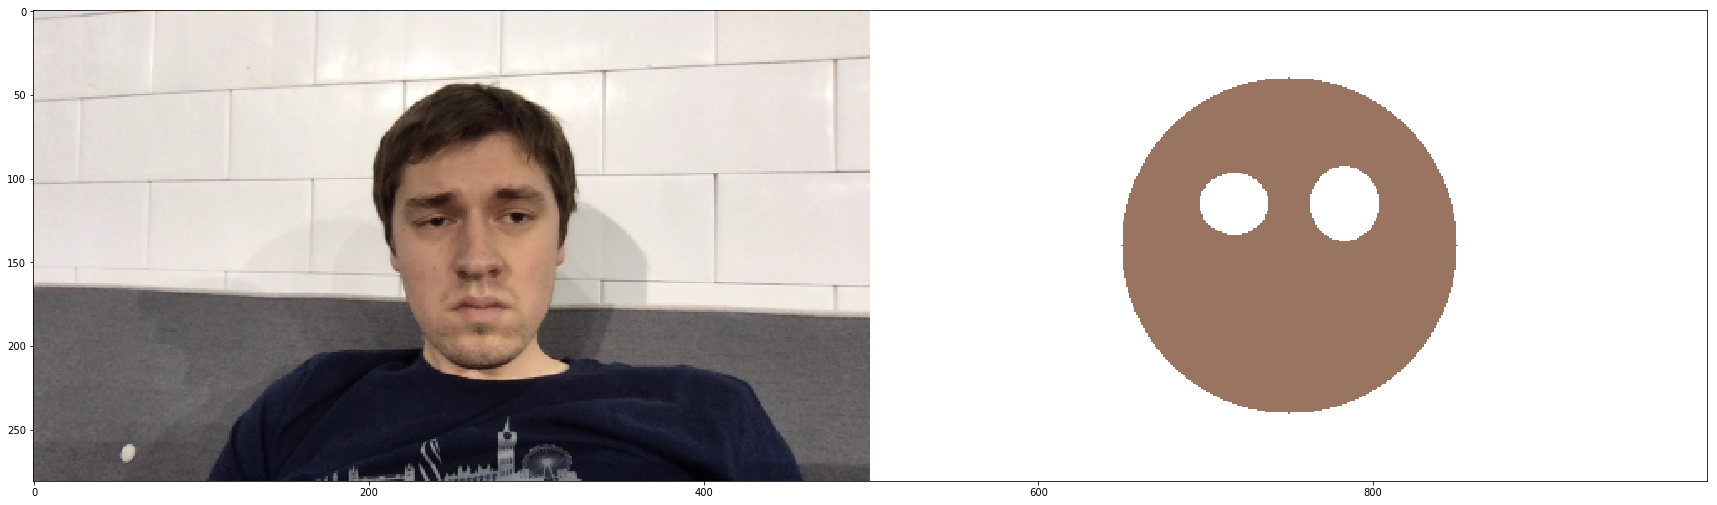

In [2]:
# import the necessary packages

args = {
    'shape_predictor': 'shape_predictor_68_face_landmarks.dat',
    'image': 'face/3.jpg'
}
camera = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
# image = myImage2
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
rects = detector(gray, 1)

def doSmile(image, shape, leftEAR, rightEAR):
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = image[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
    skin = image.copy()
    skin[:] = (255, 255, 255)
    skinColor = getAvgColor(roi)
    
    radius = 100
    xx = radius // 3
    yy = radius // 4
    WHITE = (255, 255, 255)
    eye = lambda x: abs(int(5 + (x - 0.15) / 0.2 * 35))
    cv2.circle(skin, (skin.shape[1] // 2, skin.shape[0] // 2), radius, skinColor, -1)
    cv2.ellipse(skin, (skin.shape[1] // 2 - xx, skin.shape[0] // 2 - yy), 
                (20, eye(leftEAR)), 0, 0, 360, WHITE, -1)
    cv2.ellipse(skin, (skin.shape[1] // 2 + xx, skin.shape[0] // 2 - yy), 
                (20, eye(rightEAR)), 0, 0, 360, WHITE, -1)

    return (np.hstack([image, skin]))

while True:
    (grabbed, frame) = camera.read()
    frame = imutils.resize(frame, width = 500)
    image = frame
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        ear = (leftEAR + rightEAR) / 2.0
        
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.putText(frame, "Left EAR: {:.2f}".format(leftEAR), (300, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "Right EAR: {:.2f}".format(rightEAR), (300, 60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        for (x, y) in shape:
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
            
    cv2.imshow("images", doSmile(image, shape, leftEAR, rightEAR))
    
pl(doSmile(image, shape, leftEAR, rightEAR))

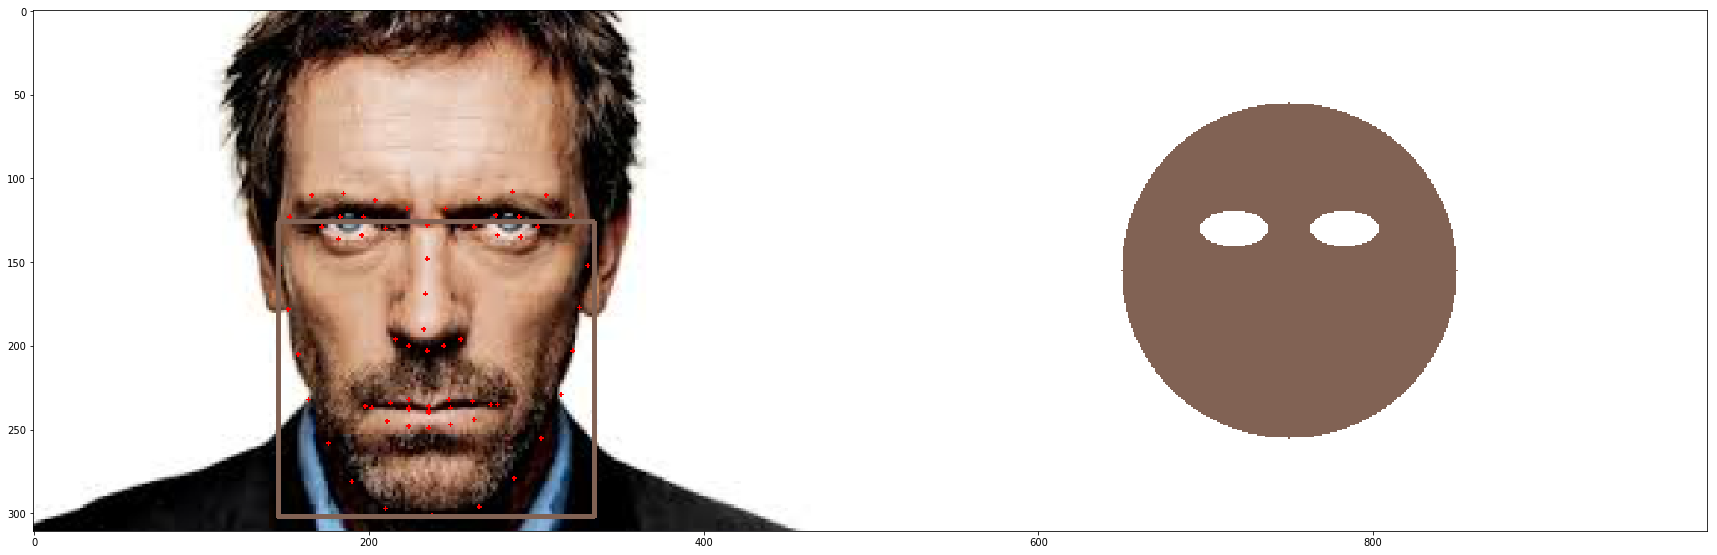